In [1]:
import scipy  
import numpy as np
import math 
import matplotlib.pyplot as plt
import matplotlib as mpl # für Farben
import time

In [2]:
def newton_c(z0,a,nend):                      # Iteration auf die Nullstelle z0=1
    zn = z0
    n = 0
    r = 100000
    while(r>=10**(-2) and n<nend):             #"r>=10**(-2)" ist Abbruchbed. sonst "while" bis nend
        znp = zn-((zn**3)+((a-1)*zn)-a)/(3*(zn**2)+(a-1))
        zn = znp
        n = n+1
        r = math.sqrt((znp.imag)**2 +(1-znp.real)**2)   # Abstand zur Nullstelle z0=1
    if (znp !=1):
        znp=0
    return znp,n

def newton_c_div(z0,a,nend):                    # Iteration auf alle Nullstellen
    zn = z0
    n = 0
    n1 = 0
    n2 = 0
    n3 = 0
    r1 = 100000
    r2 = 100000
    r3 = 100000
    
    while(n1<nend and r1>=10**(-2)):                           #Check z0=0
        znp = zn-((zn**3)+((a-1)*zn)-a)/(3*(zn**2)+(a-1))
        zn = znp
        n1 = n1+1
        r1 = math.sqrt((znp.imag)**2 +(znp.real)**2)  #z0=0
    
    zn = z0    
    while(n2<nend and r2>=10**(-2)):                           #Check z0=1
        znp = zn-((zn**3)+((a-1)*zn)-a)/(3*(zn**2)+(a-1))
        zn = znp
        n2 = n2+1
        r2 = math.sqrt((znp.imag)**2 +(1-znp.real)**2) #z0=1
    
    zn = z0
    while(n3<nend and r3>=10**(-2)):                           #Check z0=-1
        znp = zn-((zn**3)+((a-1)*zn)-a)/(3*(zn**2)+(a-1))
        zn = znp
        n3 = n3+1
        r3 = math.sqrt((znp.imag)**2 +(1+znp.real)**2) #z0=-1
        
    if(n1==nend and n2==nend):
         n=n3
    
    if(n2==nend and n3==nend):
         n=n1
    
    if(n1==nend and n3==nend):
         n=n2
    
    if(n1==nend and n2==nend and n3==nend):
         n=nend
         
    return znp,n

In [3]:
size = 5    # Qudaratisches Intervall um Ursprung 20, 0.3,40
step = .005       # Schrittweite für Real- und Imaginär-Achse
nend = 40  # Anzahl der maximalen Iterationsschritte
intv = np.arange(-size/2,size/2+step,step)

################
#Part 1
################

#  Matrix       (         (            Reale Spalten                     )*imaginäre Zeilen)         
werte = np.array([np.array([newton_c(complex(re,im),0,nend)[1]for re in intv])for im in intv])

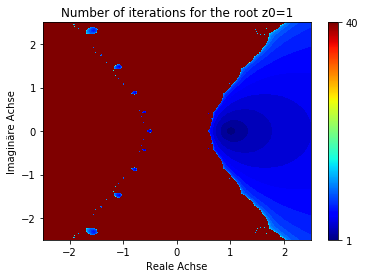

In [21]:
plt.imshow(werte.real,cmap='jet',interpolation = 'none',aspect ='auto',extent =[-size/2,size/2,-size/2,size/2]) # umbenennen des Plots für Colorbar
plt.colorbar(wertefeld, ticks=[1,nend])

plt.title('Number of iterations for the root z0=1')
plt.ylabel('Imaginäre Achse')
plt.xlabel('Reale Achse')
plt.show()

In [22]:
########################
# Part 2
########################
#a=complex(0.32,1.64)
                                                    ######HIER IST A ######               
#  Matrix       (         (            Reale Spalten                     )*imaginäre Zeilen)         
werte = np.array([np.array([newton_c_div(complex(re,im),complex(0.32,1.64),nend)[1]for re in intv])for im in intv])

In [23]:
#fig = plt.subplots(figsize=(10,10),dpi=100)  # zwei Plots definieren, fig ist der Colorbar

plt.imshow(werte.real,cmap='jet',interpolation = 'none',aspect ='auto',extent =[-size/2,size/2,-size/2,size/2]) # umbenennen des Plots für Colorbar
fig.colorbar(wertefeld, ticks=[1,nend])

plt.title('Number of iterations for any roots')
plt.ylabel('Imaginäre Achse')
plt.xlabel('Reale Achse')

# =============================================================================
# plt.figure(num='none',figsize=(10,10),dpi=150)
# plt.title('Startwerte für z, die nach Nullstelle konvergieren (gleiche Farbe)')
# plt.ylabel('Imaginäre Achse')
# plt.xlabel('Reale Achse')
# 
# plt.imshow(werte.real,cmap='jet',interpolation = 'none',aspect ='auto',extent =[-size/2,size/2,-size/2,size/2])
# 
# 
# =============================================================================

Text(0.5,0,'Reale Achse')

In [ ]:
fig, plt = plt.subplots(figsize=(10,10),dpi=100)  # zwei Plots definieren, fig ist der Colorbar
